<a href="https://colab.research.google.com/github/SHAZAN01/Machine-Learning/blob/main/Boston_Multi%2C_Ridge%2C_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Learning Objective -

1. Data Pre Processing
2. Apply Multi Linear Regression, Ridge Regression(L2 Regularisation), Lasso Regression(L1 Regularisation)


**Boston Housing dataset**

The dataset contains 506 rows and 14 columns. It consists of price of houses in various locations in Boston. Along with price, the dataset also provides information such as :

* CRIM - per capita crime rate by town.
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* NOX - nitrogen oxides concentration (parts per 10 million).
* RM - average number of rooms per dwelling.
* AGE - proportion of owner-occupied units built prior to 1940.
* DIS - weighted mean of distances to five Boston employment centres.
* RAD - index of accessibility to radial highways.
* TAX - full-value property-tax rate per $10,000$.
* PTRATIO - pupil-teacher ratio by town.
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* LSTAT - Percentage of lower status of the population
* MEDV - Median value of owner-occupied homes in $1000s



### Import Dataset

In [ ]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
l=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B',"LSTAT"]
df1=pd.DataFrame(data,columns=l)
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
df2=pd.DataFrame(target,columns=["MEDV"])
df2

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [ ]:
df=df1.copy()
df["MEDV"]=df2["MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Mathematical Intuitions

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.shape, target.shape

((506, 13), (506,))

### Data Visualisation

<Axes: >

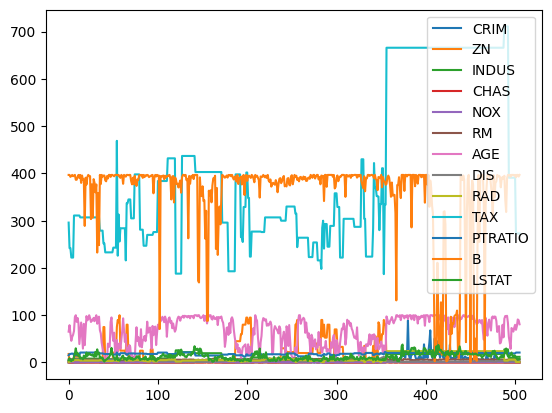

In [ ]:
# Input data plot
df1.plot()

<Axes: >

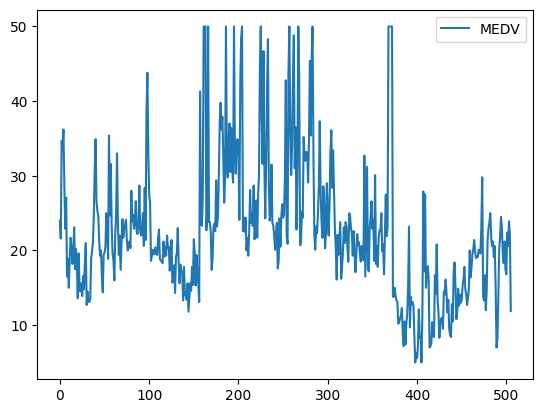

In [ ]:
# Output/Target data plot
df2.plot()

<Axes: >

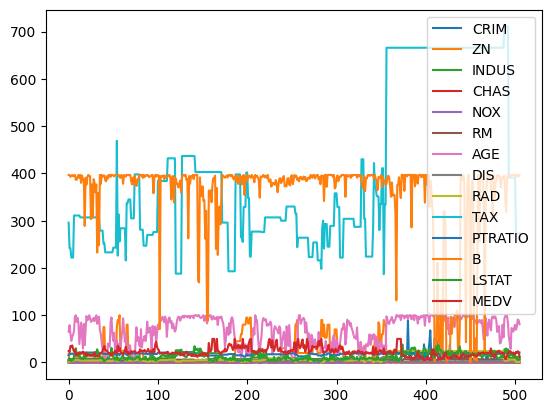

In [ ]:
# Total Data plot (Input+Target)
df.plot()

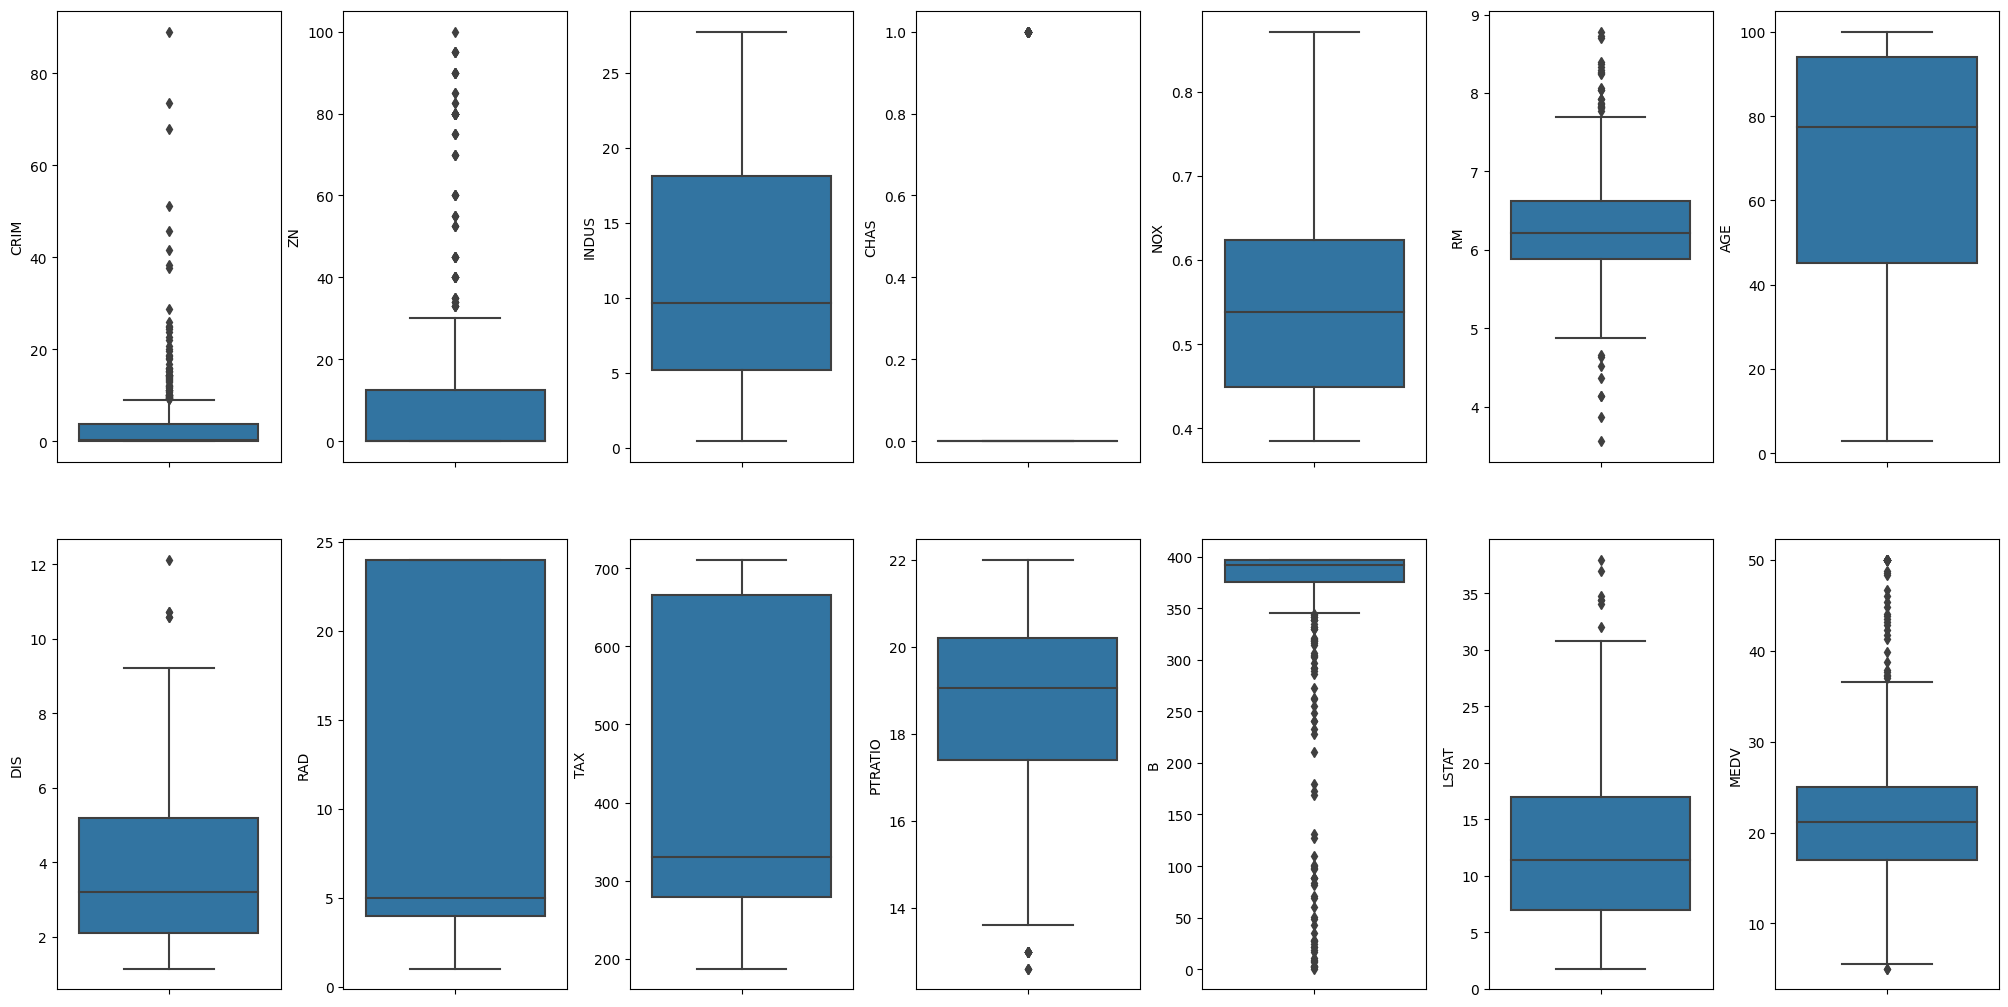

In [ ]:
# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

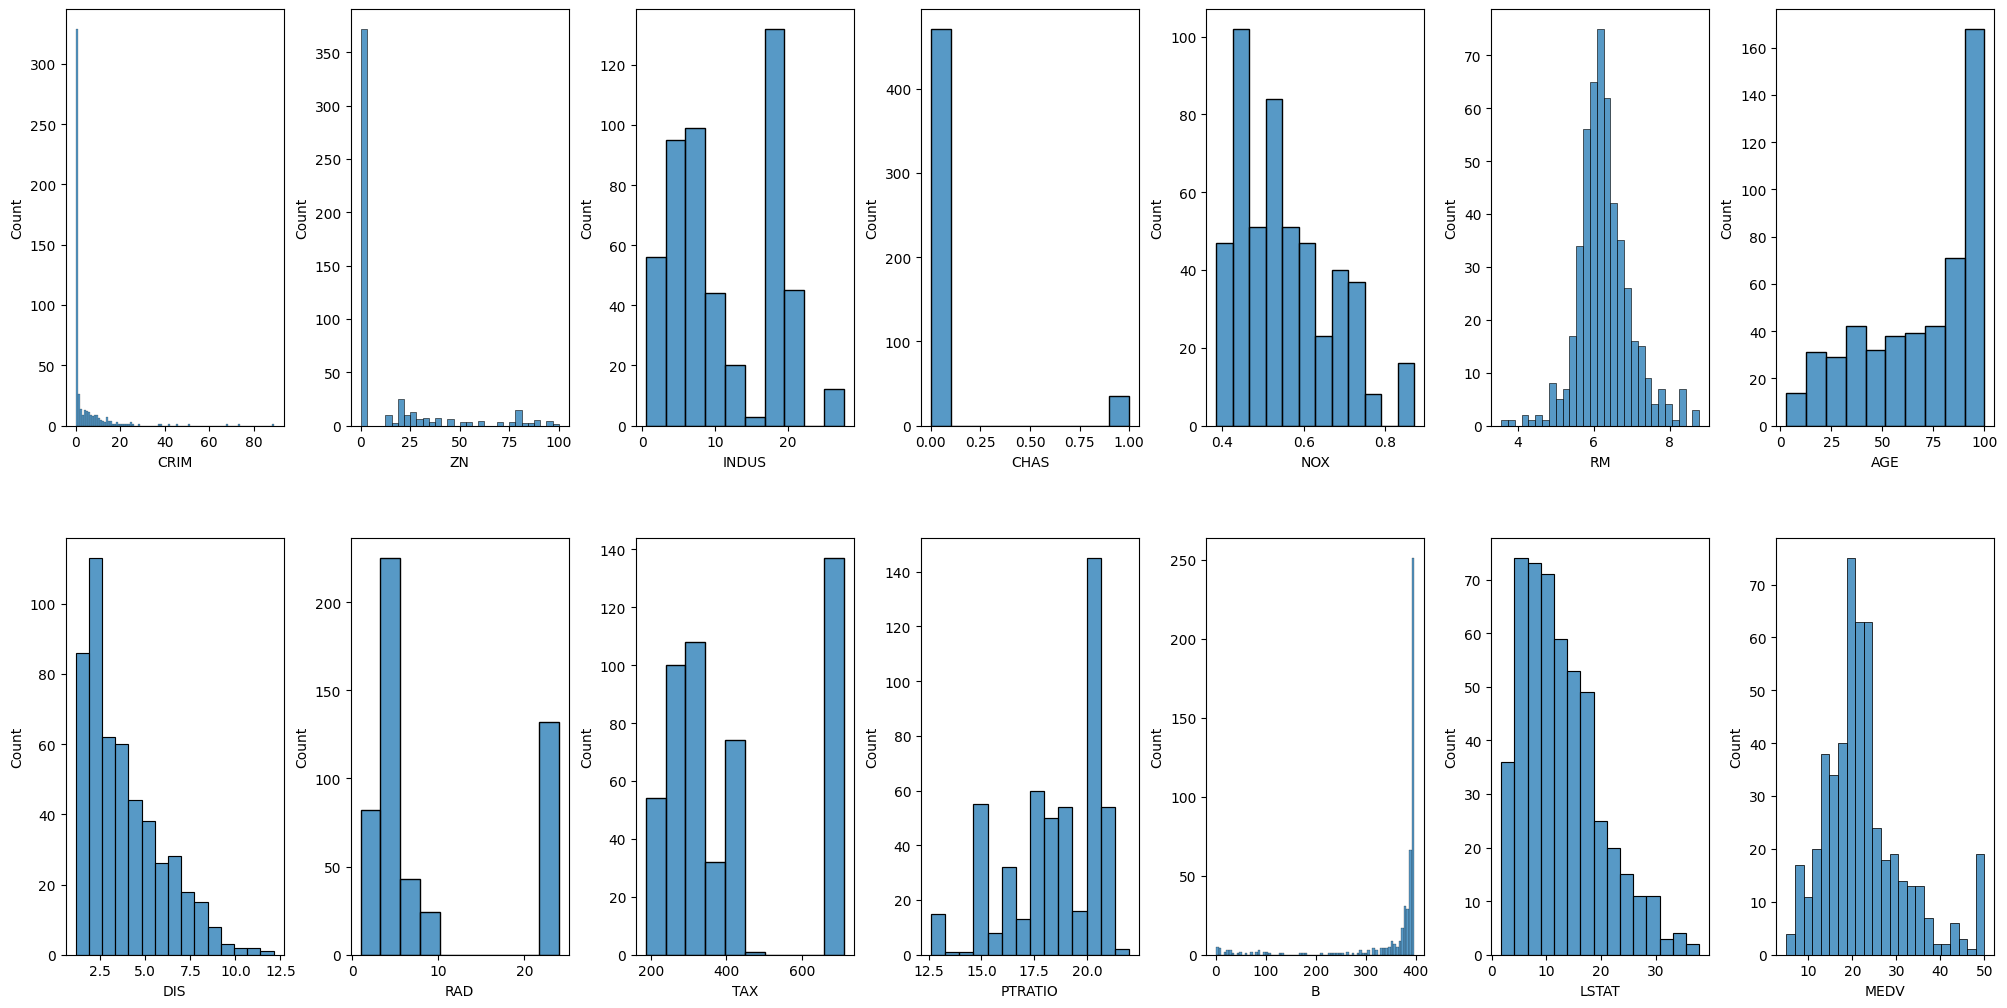

In [ ]:
# Histplots
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

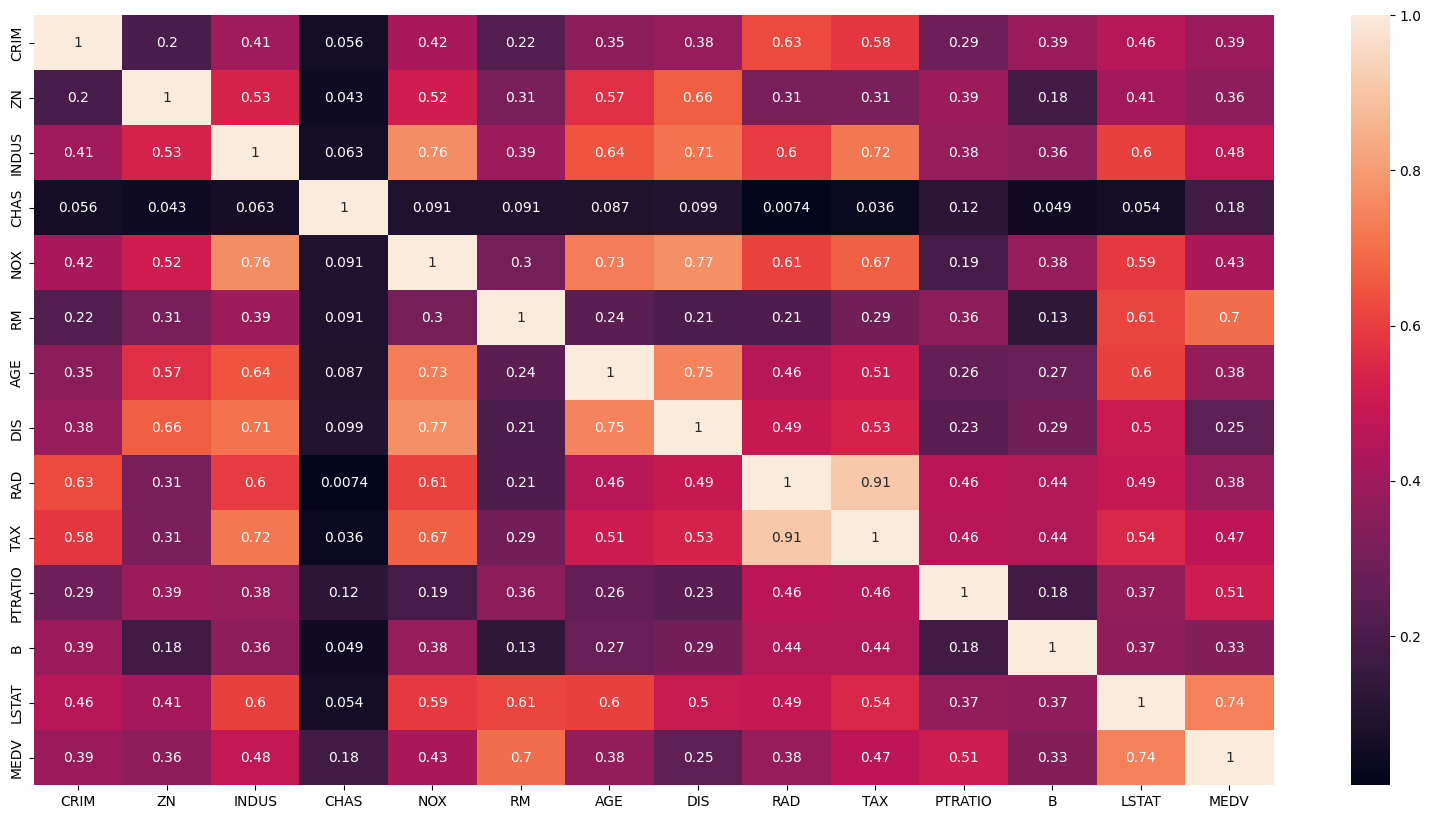

In [ ]:
# Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

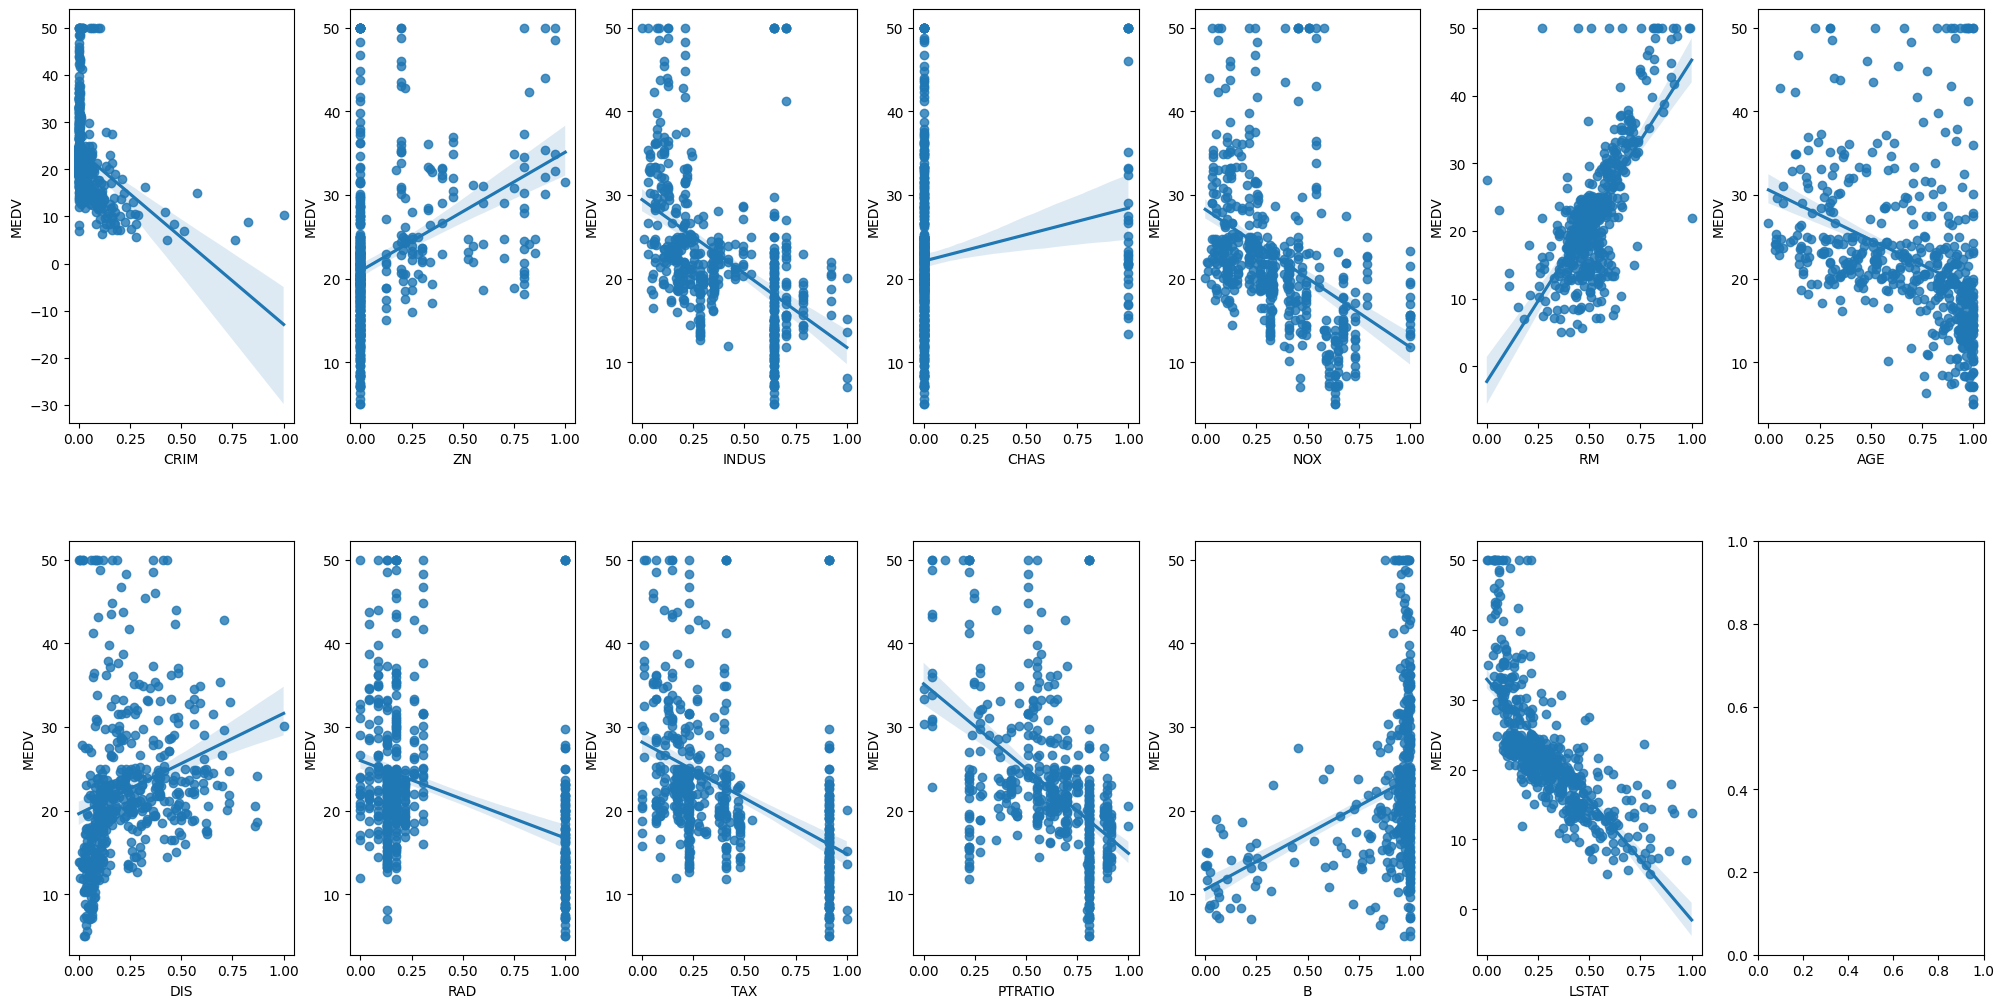

In [ ]:
# Scaled input(each column) plots Vs Target
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
x = df1
y = df2
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=df1.columns)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(df1.columns):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Correlation
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
# Pair Plot
import seaborn as sns
sns.pairplot(df)

### Data Modelling

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import  mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
train_input,test_input,train_output,test_output= train_test_split(df1,df2,test_size=0.33,random_state=23)
l=[train_input,test_input,train_output,test_output]
for i in l:
  print(i.shape)

(339, 13)
(167, 13)
(339, 1)
(167, 1)


## Linear Regression

In [ ]:
linear_reg = LinearRegression()
linear_reg.fit(train_input,train_output)

LinearRegression()

In [ ]:
y_pred = linear_reg.predict(test_input)
y_pred

array([[25.43521092],
       [26.92528475],
       [26.61561968],
       [16.75011786],
       [39.16146699],
       [15.88096689],
       [19.35616464],
       [29.27433694],
       [33.95457646],
       [38.4970037 ],
       [16.21234488],
       [27.79572402],
       [25.21955407],
       [25.522552  ],
       [21.31825913],
       [18.72066711],
       [31.27037202],
       [31.21542874],
       [29.06741334],
       [29.01880874],
       [19.72186955],
       [18.00610502],
       [25.11520172],
       [24.08827294],
       [13.54318269],
       [22.0274952 ],
       [33.12301797],
       [28.47470195],
       [30.02146944],
       [40.2826771 ],
       [18.8506982 ],
       [14.83639965],
       [19.76952537],
       [19.32774528],
       [20.34436187],
       [38.14288677],
       [24.09611189],
       [30.97490755],
       [13.03342304],
       [36.39891446],
       [ 8.55069812],
       [13.93027832],
       [11.42779525],
       [19.62397191],
       [36.68961871],
       [19

**Performance Metrics**

In [ ]:
linear_mse = mean_squared_error(y_pred,test_output)
linear_rmse=np.sqrt(mean_squared_error(y_pred,test_output))
linear_mae = mean_absolute_error(y_pred,test_output)
linear_r2 = r2_score(y_pred,test_output)
print(linear_mse,linear_rmse,linear_mae,linear_r2)

24.554333387831353 4.955232929725035 3.719422416972186 0.6528899013263255


**Coefficients and intercept**

In [ ]:
coefficients = linear_reg.coef_
intercept = linear_reg.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

Coefficients:
 [[-8.82403653e-02  4.32159895e-02 -1.14238917e-02  3.30177730e+00
  -1.66432710e+01  4.31581727e+00  7.78005042e-04 -1.40796984e+00
   2.79968048e-01 -8.48874011e-03 -8.34341462e-01  1.53159664e-02
  -5.44190855e-01]]
Intercept: [27.40495952]


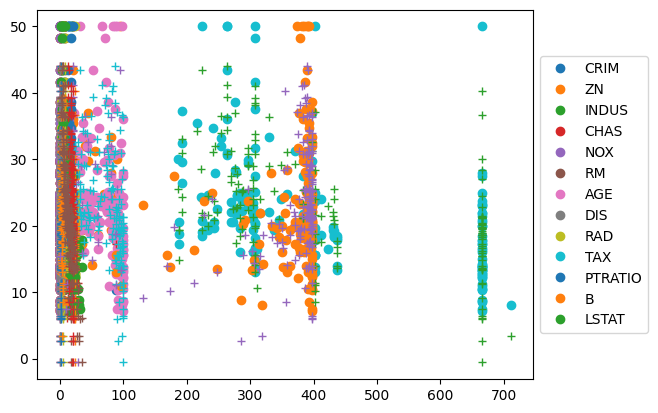

In [ ]:
plt.plot(test_input,test_output,'o',label=df1.columns)
plt.plot(test_input,y_pred,'+')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

## RIDGE REGRESSION

**Importing required Libraries**

In [ ]:
from sklearn.preprocessing import StandardScaler

**Scaling the Data**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

**Ridge Regression**

In [ ]:
alpha = 1.0  # Regularization strength, you can experiment with different values
ridge_reg = Ridge(alpha=alpha)
ridge_reg.fit(X_train_scaled, train_output)

Ridge()

**Predictions on the test set**

In [ ]:
r_y_pred = ridge_reg.predict(X_test_scaled)
r_y_pred

array([[25.43247844],
       [26.90362265],
       [26.52221106],
       [16.77224376],
       [39.13149613],
       [15.85252219],
       [19.25543628],
       [29.31102054],
       [33.88644915],
       [38.44600084],
       [16.16962432],
       [27.80179205],
       [25.1948176 ],
       [25.4963831 ],
       [21.3359236 ],
       [18.83077102],
       [31.30873764],
       [31.21122122],
       [29.03345307],
       [28.9988173 ],
       [19.72301374],
       [17.99193943],
       [25.14187144],
       [24.09364793],
       [13.49057429],
       [21.97737261],
       [33.07854736],
       [28.42299587],
       [29.9525896 ],
       [40.28632313],
       [18.8213437 ],
       [14.8527303 ],
       [19.73098134],
       [19.22219888],
       [20.27840454],
       [38.11352333],
       [24.07259879],
       [30.91030126],
       [13.07500929],
       [36.35940343],
       [ 8.64033124],
       [13.90660979],
       [11.51099035],
       [19.64968079],
       [36.61405568],
       [19

**Performance Metrics**

In [ ]:
ridge_mse = mean_squared_error(y_pred,test_output)
ridge_rmse=np.sqrt(mean_squared_error(y_pred,test_output))
ridge_mae = mean_absolute_error(y_pred,test_output)
ridge_r2 = r2_score(y_pred,test_output)
print(ridge_mse,ridge_rmse,ridge_mae,ridge_r2)

24.554333387831353 4.955232929725035 3.719422416972186 0.6528899013263255


**Coefficients and intercept**

In [ ]:
coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

Coefficients:
 [[-0.74626266  1.02466745 -0.10564747  0.91338388 -1.88877392  2.87889471
   0.00936192 -2.93351821  2.30246928 -1.33532353 -1.76426502  1.41775633
  -3.83727081]]
Intercept: [22.66843658]


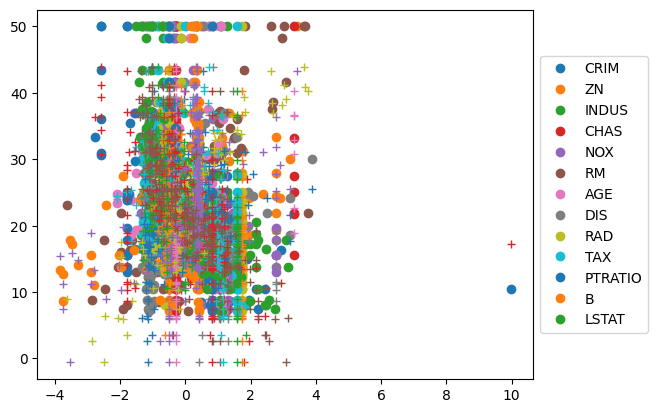

In [ ]:
plt.plot(X_test_scaled,test_output,'o',label=df1.columns)
plt.plot(X_test_scaled,r_y_pred,'+')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

## LASSO REGRESSION

**Scaling the Data**

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_input)
X_test_scaled = scaler.transform(test_input)

**Lasso Regression**

In [ ]:
alpha = 1.0  # Regularization strength, you can experiment with different values
lasso_reg = Lasso(alpha=alpha)
lasso_reg.fit(X_train_scaled, train_output)

Lasso()

**Predictions on the test set**

In [ ]:
l_y_pred = lasso_reg.predict(X_test_scaled)
l_y_pred

array([23.38904086, 24.3892848 , 23.30548117, 21.16180142, 25.24432496,
       20.1877713 , 21.6161954 , 24.63848168, 25.18863166, 25.08281259,
       19.48299005, 24.41813351, 23.30376404, 23.00724488, 22.73745373,
       22.04795929, 24.48205913, 24.55108415, 23.65088667, 24.74167542,
       21.90812276, 20.78977195, 24.63169685, 24.00622429, 18.92014391,
       22.57630249, 24.76406096, 24.06665586, 23.66518158, 24.08609261,
       21.37953682, 20.94394285, 20.54016193, 21.7018459 , 22.41223713,
       24.88214571, 23.32292815, 24.60744291, 20.87125518, 23.99850914,
       18.79324031, 19.6053479 , 19.25820016, 23.33798956, 24.65628022,
       22.48254104, 21.77387769, 23.44672094, 19.96997432, 25.13154289,
       23.67108992, 17.88499644, 21.52887499, 21.53860204, 23.16520161,
       23.41874575, 17.55218307, 23.24856579, 21.46832684, 22.17241573,
       22.47376463, 24.30517326, 24.36966808, 24.65190009, 23.51418487,
       23.97707125, 21.19110572, 20.50590173, 24.29684468, 20.11

**Performance Metrics**

In [ ]:
lasso_mse = mean_squared_error(y_pred,test_output)
lasso_rmse=np.sqrt(mean_squared_error(y_pred,test_output))
lasso_mae = mean_absolute_error(y_pred,test_output)
lasso_r2 = r2_score(y_pred,test_output)
print(lasso_mse,lasso_rmse,lasso_mae,lasso_r2)

24.554333387831353 4.955232929725035 3.719422416972186 0.6528899013263255


**Coefficients and intercept**

In [ ]:
coefficients = lasso_reg.coef_
intercept = lasso_reg.intercept_
print("Coefficients:\n", coefficients)
print("Intercept:", intercept)

Coefficients:
 [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.68198916 -0.          0.
 -8.82200145]
Intercept: [25.53409396]


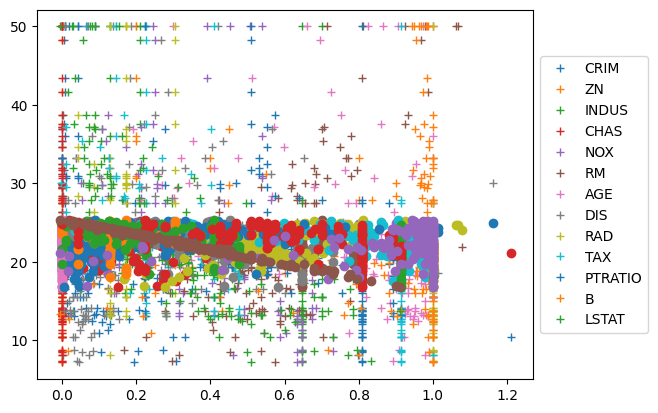

In [ ]:
plt.plot(X_test_scaled,test_output,'+',label=df1.columns)
plt.plot(X_test_scaled,l_y_pred,'o')
ax = plt.subplot(111)
ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.show()